In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error, r2_score
from sklearn import metrics

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')
df


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [3]:
df.shape

(319795, 18)

In [4]:
num_duplicates = df.duplicated().sum()
df = df.drop_duplicates()
print(f"Number of duplicate rows removed: {num_duplicates}")

Number of duplicate rows removed: 18078


In [5]:
df.shape

(301717, 18)

# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     301717 

In [8]:
num_col = df.select_dtypes(include=["float64","int64"]).columns
print("Numerical dftype Column:")
num_col

Numerical dftype Column:


Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

In [9]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [10]:
cat_col = df.select_dtypes(include="object").columns
print("Catagorical dftype Column:")
cat_col

Catagorical dftype Column:


Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

##### Histogram

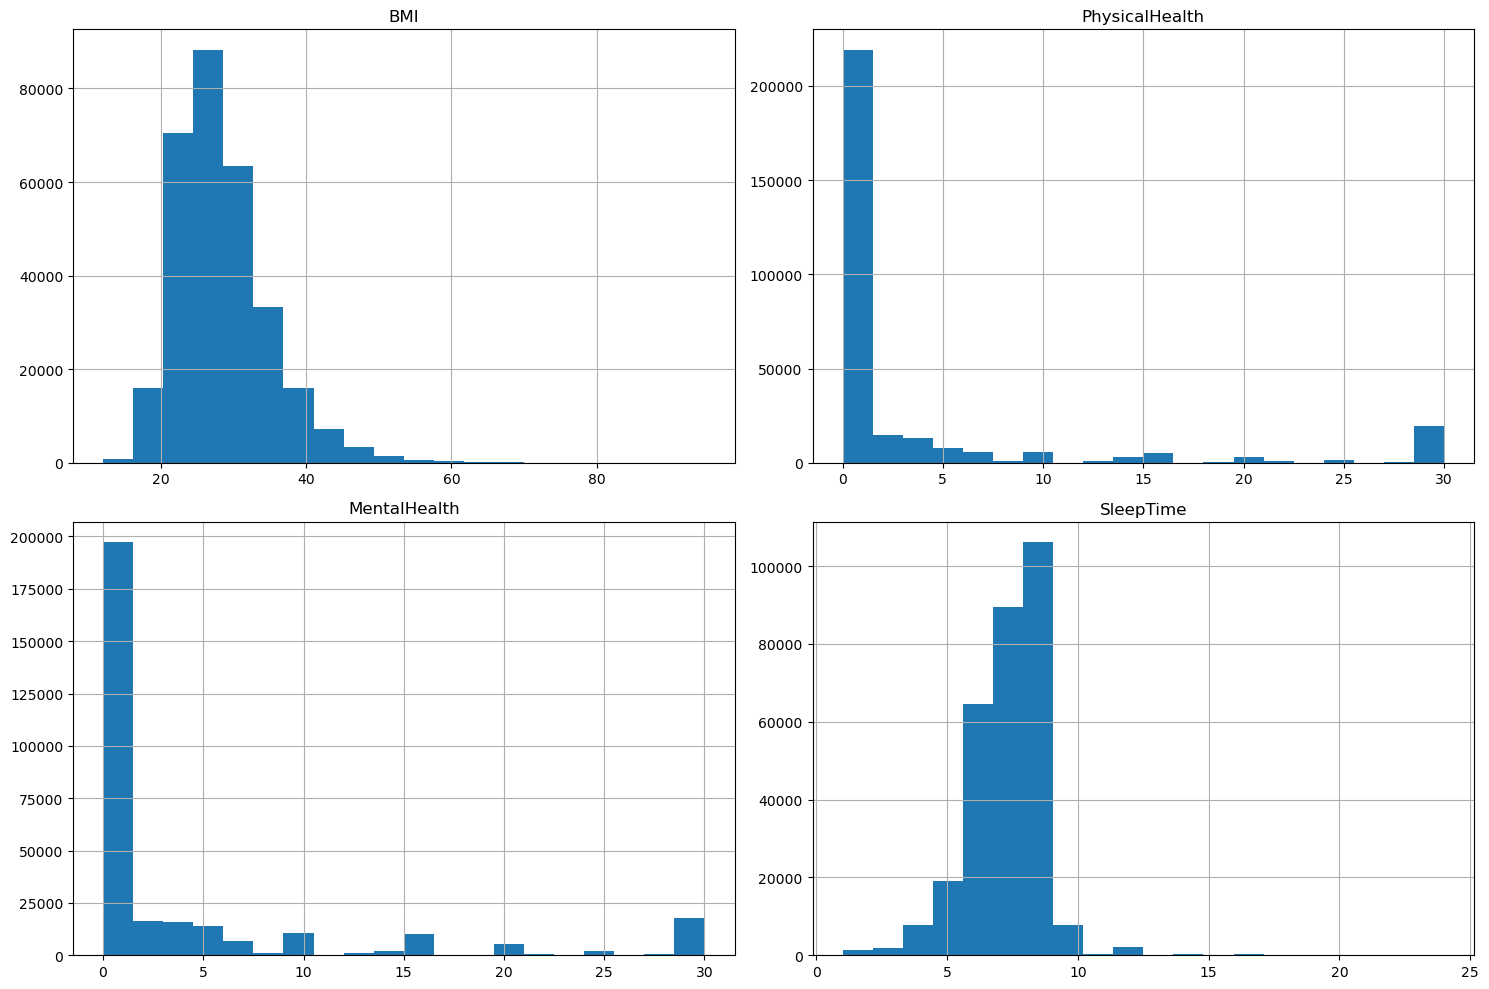

In [12]:
df.hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

##### Exploring categorical df:

In [14]:
for col in cat_col:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())


Value counts for 'HeartDisease':
HeartDisease
No     274456
Yes     27261
Name: count, dtype: int64

Value counts for 'Smoking':
Smoking
No     174312
Yes    127405
Name: count, dtype: int64

Value counts for 'AlcoholDrinking':
AlcoholDrinking
No     280136
Yes     21581
Name: count, dtype: int64

Value counts for 'Stroke':
Stroke
No     289653
Yes     12064
Name: count, dtype: int64

Value counts for 'DiffWalking':
DiffWalking
No     257362
Yes     44355
Name: count, dtype: int64

Value counts for 'Sex':
Sex
Female    159671
Male      142046
Name: count, dtype: int64

Value counts for 'AgeCategory':
AgeCategory
65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: count, dtype: int64

Value counts for 'Race':
Race
White                             227724
Hispanic

### Exploring Relationship among Variables

##### Heatmap

C:\Users\Gopal Bhalani\AppData\Local\Temp\ipykernel_27736\2835008825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0})
C:\Users\Gopal Bhalani\AppData\Local\Temp\ipykernel_27736\2835008825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Smoking'] = df['Smoking'].map({'Yes': 1, 'No': 0})
C:\Users\Gopal Bhalani\AppData\Local\Temp\ipykernel_27736\2835008825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

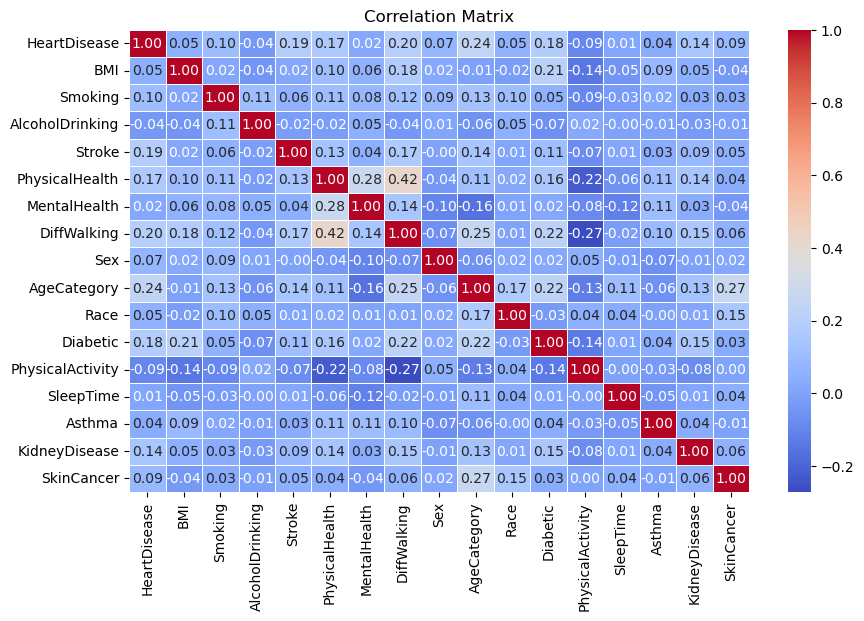

In [17]:
df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0})
df['Smoking'] = df['Smoking'].map({'Yes': 1, 'No': 0})
df['AlcoholDrinking'] = df['AlcoholDrinking'].map({'Yes': 1, 'No': 0})
df['Stroke'] = df['Stroke'].map({'Yes': 1, 'No': 0})
df['DiffWalking'] = df['DiffWalking'].map({'Yes': 1, 'No': 0})
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})
df['Asthma'] = df['Asthma'].map({'Yes': 1, 'No': 0})
df['KidneyDisease'] = df['KidneyDisease'].map({'Yes': 1, 'No': 0})
df['SkinCancer'] = df['SkinCancer'].map({'Yes': 1, 'No': 0})
df['PhysicalActivity'] = df['PhysicalActivity'].map({'Yes': 1, 'No': 0})


df['AgeCategory'] = df['AgeCategory'].map({
    '18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3,
    '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7,
    '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80 or older': 12
})

df['Race'] = df['Race'].map({
    'White': 5, 'Black': 2, 'Hispanic': 3, 'Asian': 1, 'Other': 4
})

df['Diabetic'] = df['Diabetic'].map({
    'Yes': 2, 'No': 0, 'Borderline': 1, 'Yes,During Pregnancy': 3
})
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Finding issue in data

In [19]:
print("\nMissing Values in the Dataset:")
missing_values = df.isnull().sum()
print(missing_values)


Missing Values in the Dataset:
HeartDisease           0
BMI                    0
Smoking                0
AlcoholDrinking        0
Stroke                 0
PhysicalHealth         0
MentalHealth           0
DiffWalking            0
Sex                    0
AgeCategory            0
Race                5192
Diabetic            9332
PhysicalActivity       0
GenHealth              0
SleepTime              0
Asthma                 0
KidneyDisease          0
SkinCancer             0
dtype: int64


In [20]:
df['Race'].fillna(df['Race'].mode()[0], inplace=True) 
df['Diabetic'].fillna(df['Diabetic'].mode()[0], inplace=True) 
df.drop(columns=['GenHealth'], inplace=True) 
df

C:\Users\Gopal Bhalani\AppData\Local\Temp\ipykernel_27736\327051043.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Race'].fillna(df['Race'].mode()[0], inplace=True)
C:\Users\Gopal Bhalani\AppData\Local\Temp\ipykernel_27736\327051043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Race'].fillna(df['Race'].mode()[0], inplace=Tru

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5.0,2.0,1,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5.0,0.0,1,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5.0,2.0,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5.0,0.0,0,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5.0,0.0,1,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3.0,2.0,0,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3.0,0.0,1,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3.0,0.0,1,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,3.0,0.0,0,12.0,0,0,0


In [21]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

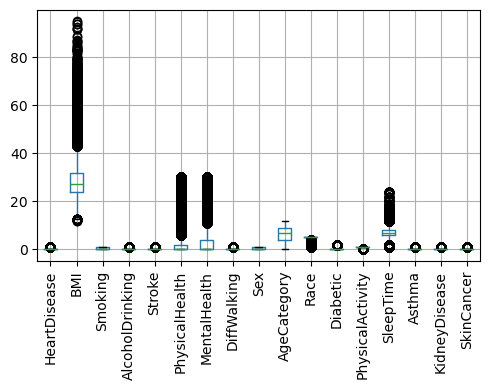

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
df.boxplot(rot=90)  
plt.tight_layout()
plt.show()


In [23]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (241373, 16)
Testing set size: (60344, 16)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  int64  
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  int64  
 3   AlcoholDrinking   301717 non-null  int64  
 4   Stroke            301717 non-null  int64  
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  int64  
 8   Sex               301717 non-null  int64  
 9   AgeCategory       301717 non-null  int64  
 10  Race              301717 non-null  float64
 11  Diabetic          301717 non-null  float64
 12  PhysicalActivity  301717 non-null  int64  
 13  SleepTime         301717 non-null  float64
 14  Asthma            301717 non-null  int64  
 15  KidneyDisease     301717 non-null  int64  
 16  SkinCancer        301717 

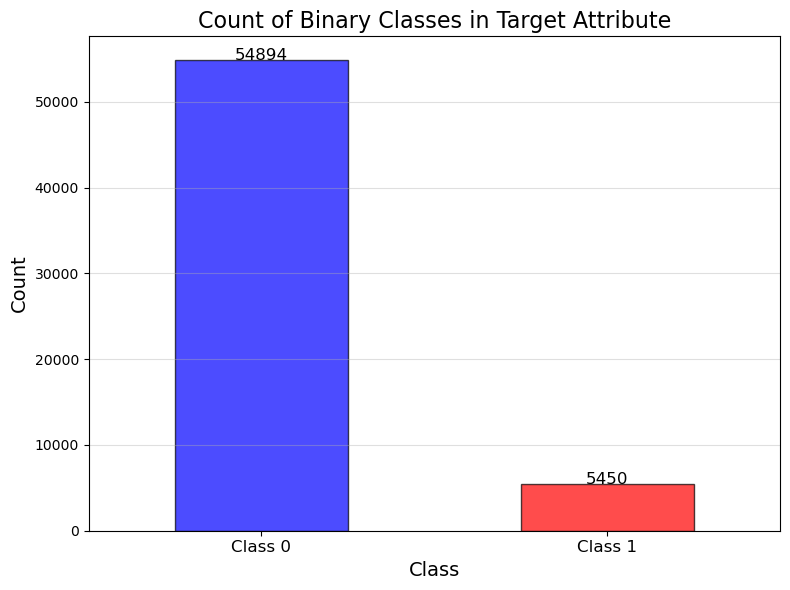

In [26]:
value_counts = y_test.value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color=['blue', 'red'], alpha=0.7, edgecolor='black')

# Add labels and title
plt.title('Count of Binary Classes in Target Attribute', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'], fontsize=12, rotation=0)
plt.grid(axis='y', alpha=0.4)

# Display counts on top of bars
for i, count in enumerate(value_counts):
    plt.text(i, count + 10, str(count), ha='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()

# MODEL APPLY

Best parameters: {'C': 0.01, 'solver': 'liblinear'}
Model Accuracy: 0.91


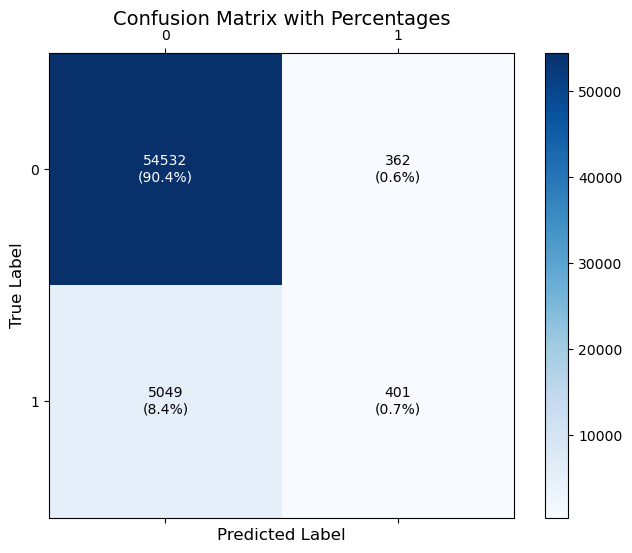

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

log_reg = LogisticRegression(max_iter=1000)  
param_grid = {
    'C': [0.01, 0.001, 1, 10],       
    'solver': ['liblinear', 'lbfgs'],  
}


grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


best_log_reg = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")


y_pred = best_log_reg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


cm = confusion_matrix(y_test, y_pred)
cm_percent = cm / cm.sum() * 100  # Convert to percentages


plt.figure(figsize=(8, 6))
plt.matshow(cm, cmap='Blues', fignum=1)
plt.title("Confusion Matrix with Percentages", pad=20, fontsize=14)
plt.colorbar()


for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        raw_count = cm[i, j]
        percent = cm_percent[i, j]
        plt.text(
            j, i, f"{raw_count}\n({percent:.1f}%)",
            ha='center', va='center', color='black' if percent < 50 else 'white'
        )

plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.xticks(range(cm.shape[1]), labels=[0, 1])
plt.yticks(range(cm.shape[0]), labels=[0, 1])
plt.grid(False)
plt.show()


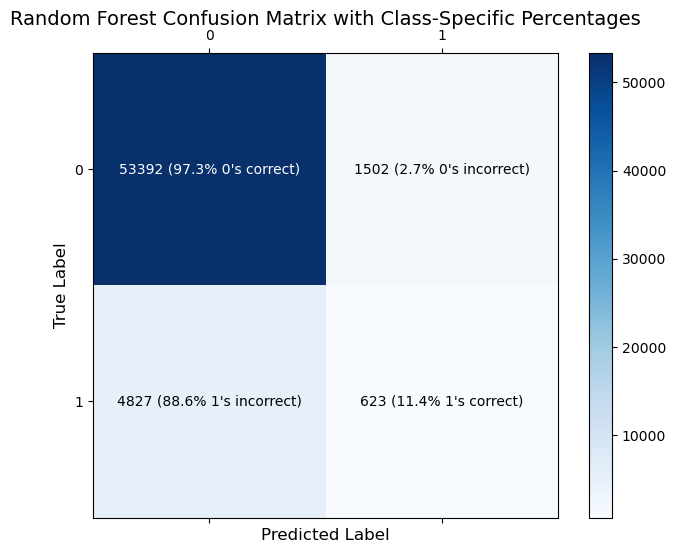

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt


rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)

class_0_total = cm_rf[0].sum()
class_1_total = cm_rf[1].sum()

class_0_correct_percent = (cm_rf[0, 0] / class_0_total) * 100
class_0_incorrect_percent = (cm_rf[0, 1] / class_0_total) * 100
class_1_correct_percent = (cm_rf[1, 1] / class_1_total) * 100
class_1_incorrect_percent = (cm_rf[1, 0] / class_1_total) * 100

plt.figure(figsize=(8, 6))
plt.matshow(cm_rf, cmap='Blues', fignum=1)
plt.title("Random Forest Confusion Matrix with Class-Specific Percentages", pad=20, fontsize=14)
plt.colorbar()

annotations = [
    f"{cm_rf[0, 0]} ({class_0_correct_percent:.1f}% 0's correct)",
    f"{cm_rf[0, 1]} ({class_0_incorrect_percent:.1f}% 0's incorrect)",
    f"{cm_rf[1, 0]} ({class_1_incorrect_percent:.1f}% 1's incorrect)",
    f"{cm_rf[1, 1]} ({class_1_correct_percent:.1f}% 1's correct)"
]

for i in range(2):
    for j in range(2):
        plt.text(
            j, i, annotations[i * 2 + j],
            ha='center', va='center', color='black' if cm_rf[i, j] < cm_rf.max() / 2 else 'white'
        )

plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.xticks(range(2), labels=[0, 1])
plt.yticks(range(2), labels=[0, 1])
plt.grid(False)
plt.show()


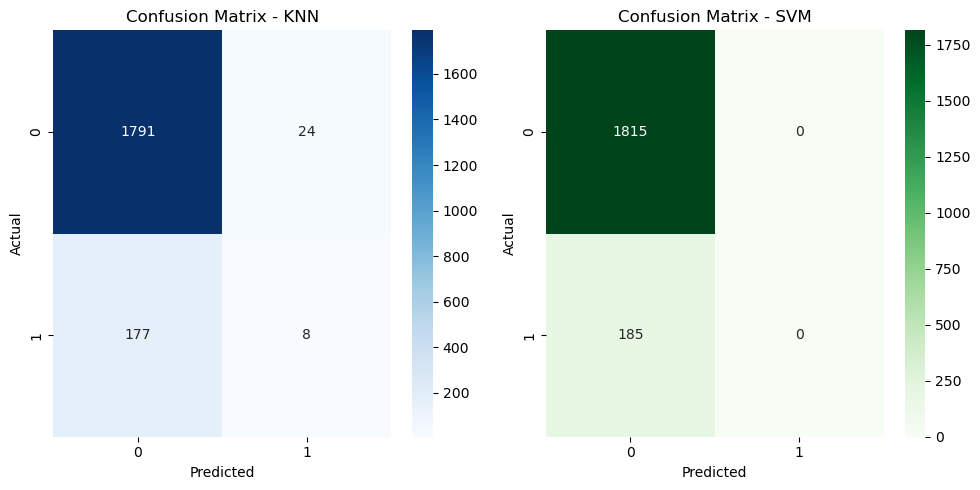

KNN Accuracy: 89.95%
SVM Accuracy: 90.75%


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your dataset
# Create a smaller subset with 10,000 rows
df_subset = df.sample(n=10000, random_state=42)

# Split the data into features and target
features = df_subset.drop('HeartDisease', axis=1)  # Replace 'HeartDisease' with your target column name
target = df_subset['HeartDisease']

# Split the dataset into training and testing sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(features, target, test_size=0.2, random_state=42)

# Train and evaluate KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_knn, y_train_knn)
y_pred_knn = knn.predict(X_test_knn)
conf_matrix_knn = confusion_matrix(y_test_knn, y_pred_knn)
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)

# Train and evaluate SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_knn, y_train_knn)
y_pred_svm = svm.predict(X_test_knn)
conf_matrix_svm = confusion_matrix(y_test_knn, y_pred_svm)
accuracy_svm = accuracy_score(y_test_knn, y_pred_svm)

# Plot confusion matrices
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', ax=plt.subplot(1, 2, 1))
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')

sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Greens', ax=plt.subplot(1, 2, 2))
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Print accuracies
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")


In [43]:
from sklearn.metrics import classification_report

# Classification report for KNN
report_knn = classification_report(y_test_knn, y_pred_knn, zero_division=0)
print("Classification Report - KNN:\n", report_knn)

# Classification report for SVM
report_svm = classification_report(y_test_knn, y_pred_svm, zero_division=0)
print("Classification Report - SVM:\n", report_svm)

# Assuming Logistic Regression and Random Forest predictions are stored in y_pred_lr and y_pred_rf respectively:
# Classification report for Logistic Regression
report_lr = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report - Logistic Regression:\n", report_lr)

# Classification report for Random Forest
report_rf = classification_report(y_test, y_pred_rf, zero_division=0)
print("Classification Report - Random Forest:\n", report_rf)


Classification Report - KNN:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1815
           1       0.25      0.04      0.07       185

    accuracy                           0.90      2000
   macro avg       0.58      0.52      0.51      2000
weighted avg       0.85      0.90      0.87      2000

Classification Report - SVM:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1815
           1       0.00      0.00      0.00       185

    accuracy                           0.91      2000
   macro avg       0.45      0.50      0.48      2000
weighted avg       0.82      0.91      0.86      2000

Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     54894
           1       0.53      0.07      0.13      5450

    accuracy                           0.91     60344
   macro avg       0.7